In [1]:
from sklearn import datasets
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

In [7]:
data = pd.read_excel('Reflux_data/Final/Final01.xlsx',index_col=False)
data

,FLUD_DPWT,SLOPE_L,SLOPE_H,SLOPE_AVG,HIGH,PUMP_RATIO,IMP_SUR_RATIO,MANHOLES_RATIO,HOUR_RAINFALL,DIST
0,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,39.0,1
1,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,78.0,1
2,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,54.5,1
3,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,46.0,1
4,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,15.5,0
...,...,...,...,...,...,...,...,...,...,...
1335,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,4.8,0
1336,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,9.6,0
1337,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,18.7,0
1338,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,15.2,0


In [11]:
feature=data[['SLOPE_AVG','HOUR_RAINFALL']]
feature

,SLOPE_AVG,HOUR_RAINFALL
0,1.0,39.0
1,1.0,78.0
2,1.0,54.5
3,1.0,46.0
4,1.0,15.5
...,...,...
1335,1.0,4.8
1336,1.0,9.6
1337,1.0,18.7
1338,1.0,15.2


In [19]:
model = KMeans(n_clusters=2,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [20]:
r = pd.concat([feature,predict],axis=1)

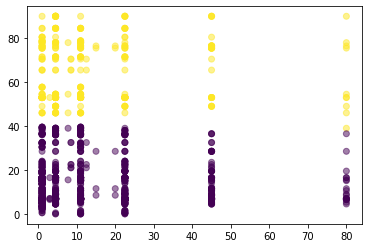

In [21]:
plt.scatter(r['SLOPE_AVG'],r['HOUR_RAINFALL'],c=r['predict'],alpha=0.5)

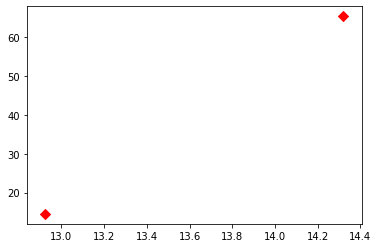

In [22]:
centers = pd.DataFrame(model.cluster_centers_,columns=['SLOPE_AVG','HOUR_RAINFALL'])
center_x = centers['SLOPE_AVG']
center_y = centers['HOUR_RAINFALL']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

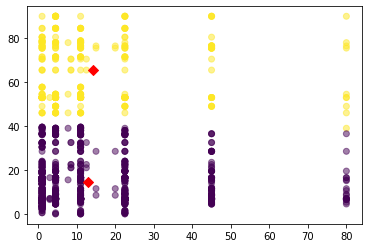

In [23]:
plt.scatter(r['SLOPE_AVG'],r['HOUR_RAINFALL'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')